In [55]:
#Importing packages 
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from pivottablejs import pivot_ui

In [37]:
#Creating the dataframe 
df_netflix = pd.read_csv('netflix_data.csv')
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   duration      7787 non-null   int64 
 9   description   7787 non-null   object
 10  genre         7787 non-null   object
dtypes: int64(2), object(9)
memory usage: 669.3+ KB


In [109]:
#quick statistics
df_netflix.describe()

,release_year,duration
count,7787.000000,7787.000000
mean,2013.932580,69.122769
std,8.757395,50.950743
min,1925.000000,1.000000
25%,2013.000000,2.000000
50%,2017.000000,88.000000
75%,2018.000000,106.000000
max,2021.000000,312.000000


In [ ]:
#checking for null values 
df.isnull().sum()

In [155]:
# Aggregation of type 
pivot_ui(df_netflix)

In [105]:
#Subsetting the dat
df_netflix_movies= df_netflix[df_netflix['type'] == 'Movie']
df_netflix_movies

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies
...,...,...,...,...,...,...,...,...,...,...,...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,88,"Dragged from civilian life, a former superhero...",Children
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,99,When Lebanon's Civil War deprives Zozo of his ...,Dramas
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,111,A scrappy but poor boy worms his way into a ty...,Dramas
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,44,"In this documentary, South African rapper Nast...",Documentaries


<AxesSubplot:xlabel='release_year', ylabel='duration'>

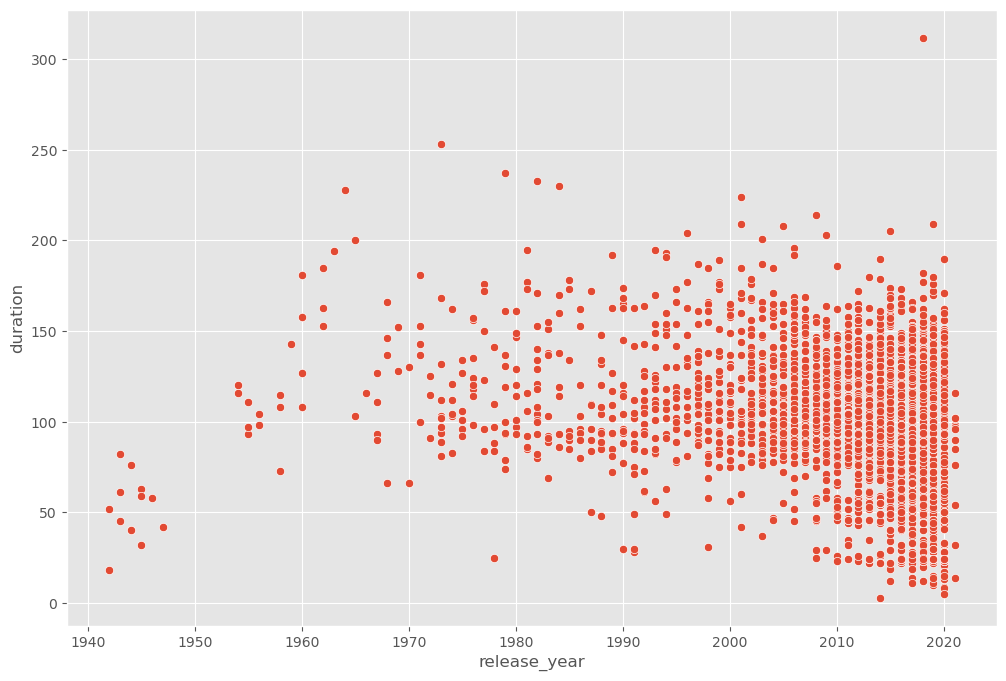

In [112]:
plt.figure(figsize = (12, 8))
sns.scatterplot(data =df_netflix_movies, x='release_year', y = 'duration')

[Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '6'),
 Text(0, 0, '8'),
 Text(0, 0, '12'),
 Text(0, 0, '16'),
 Text(0, 0, '42'),
 Text(0, 0, '86'),
 Text(0, 0, '111'),
 Text(0, 0, '155')]

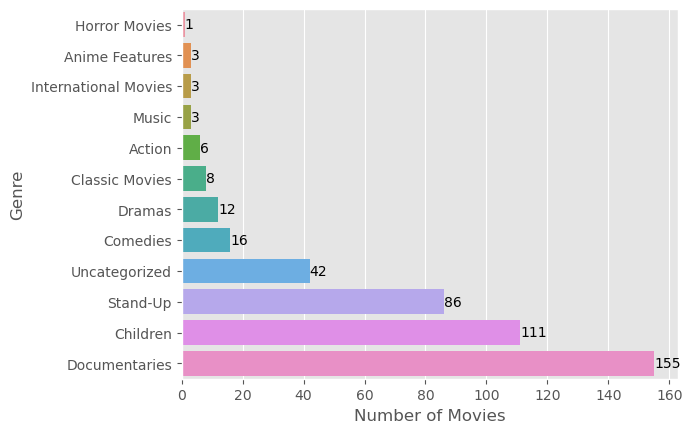

In [129]:
short_movies= df_netflix_movies[df_netflix_movies['duration'] <= 60]
short_movies_agg_genre = short_movies.groupby('genre')['show_id'].count().reset_index().sort_values('show_id')
fig2 = sns.barplot(data = short_movies_agg_genre, x= 'show_id' , y = 'genre' )
fig2.set(xlabel='Number of Movies', ylabel='Genre')
fig2.bar_label(fig2.containers[0])

In [137]:
colors = []
# Iterate over rows of netflix_movies_col_subset
for lab, row in df_netflix_movies.iterrows():
    if row['genre'] == "Children":
        colors.append("children")
    elif row['genre'] == "Documentaries":
        colors.append("documentaries")
    elif row['genre'] == "Stand-Up":
        colors.append("stand_up")
    else:
        colors.append("others")
        
# Inspect the first 10 values in your list        
print(colors[:10])

['others', 'others', 'others', 'others', 'others', 'others', 'others', 'others', 'others', 'documentaries']


<AxesSubplot:xlabel='release_year', ylabel='duration'>

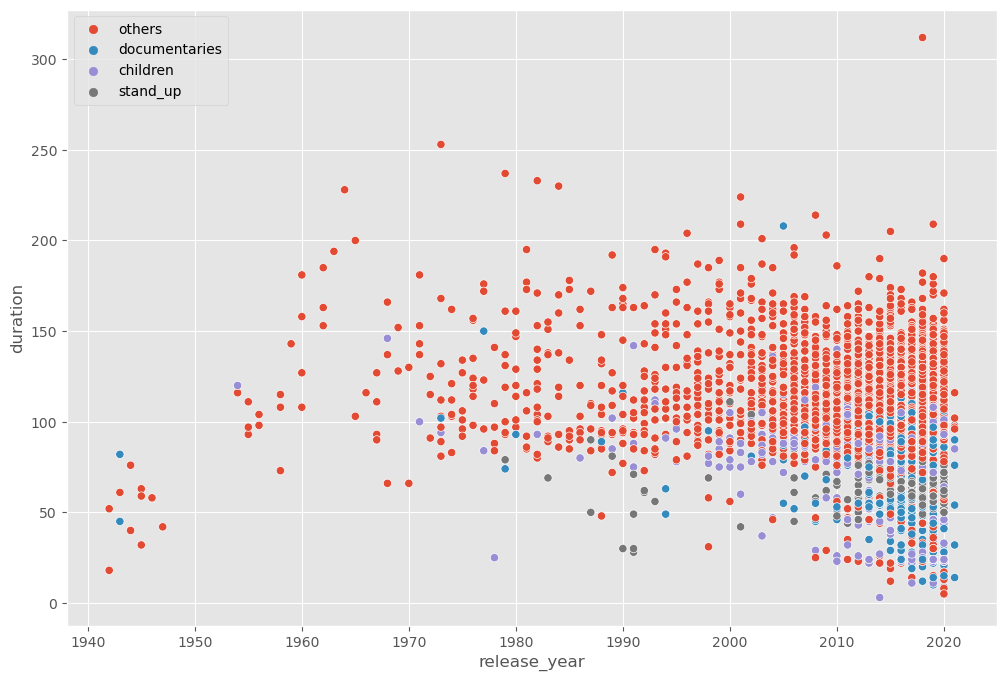

In [146]:
plt.figure(figsize = (12, 8))
sns.scatterplot(data =df_netflix_movies, x='release_year', y = 'duration', hue= colors)

In [147]:
df_netflix_country = df_netflix_movies.groupby('country')['show_id'].count().reset_index().sort_values('show_id', ascending = False)
df_netflix_country_10 = df_netflix_country[:10]
df_netflix_country_10

,country,show_id
68,United States,2100
26,India,883
67,United Kingdom,341
8,Canada,175
17,France,137
60,Spain,119
15,Egypt,93
38,Mexico,79
65,Turkey,78
33,Japan,75


[Text(0, 0, '2100'),
 Text(0, 0, '883'),
 Text(0, 0, '341'),
 Text(0, 0, '175'),
 Text(0, 0, '137'),
 Text(0, 0, '119'),
 Text(0, 0, '93'),
 Text(0, 0, '79'),
 Text(0, 0, '78'),
 Text(0, 0, '75')]

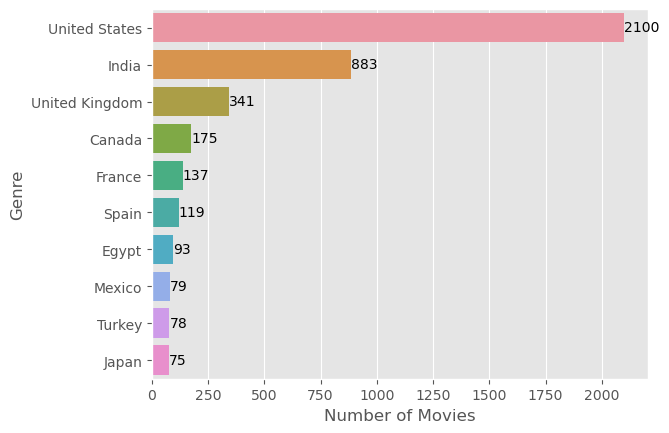

In [148]:
fig3 = sns.barplot(data = df_netflix_country_10, x = 'show_id', y = 'country')
fig3.set(xlabel='Number of Movies', ylabel='Genre')
fig3.bar_label(fig3.containers[0])

In [151]:
df_netflix_director = df_netflix_movies.groupby('director')['show_id'].count().reset_index().sort_values('show_id', ascending = False)
df_netflix_director_3 = df_netflix_director[:3]
df_netflix_director_3

,director,show_id
2962,"Raúl Campos, Jan Suter",18
2235,Marcus Raboy,15
1546,Jay Karas,14


In [ ]:
The top directors that have the highest number of movies featured on netflix are: Raúl Campos, Jan Suter, Marcus Raboy, Jay Karas.